In [10]:
!pip install pandas scikit-learn matplotlib


In [11]:
print("Today, I'm learning how AI helps soc analysts detect anomalies in network data.")

Today, I'm learning how AI helps soc analysts detect anomalies in network data.


# **Anomaly Detection**

**Definition**: It detects outliers in data.

Uses IPL - Indian Premier league example of scoring.

Maximum is 36 to score, not 100.

# **3 Anomaly Detection types**


> 1. **Isolation Forest**

It can have clusters, single data points, which makes it difficult to identify what is an outlier.

**What will it do?**

It will try to split the data points. For every data points, it will create a leaf node. EVERY DATA, a leaf node will be created, with respect to any number of splits that may happen.

**What's one important thing to understand?**

We are able to differentiate with respect to the other points.

We are able to comletely isolate(seperated) data points. In return, we isolate it as a leaf node.

Isolate via splits.

To find an outlier, we quickly isolate the data points.

Decision trees are Isolated Trees!

> **What's a formula that computes the anomaly score for a new point?**

        S(x,m) = 2 ^-E(h(x))/c(m)

> m = number of data points
> x = data point

> h(x) = average search depth for x from the isolated tree

Ex: 1 depth for isolated data point. Can go to many more, depending where the isolated data is.
> E = The average of the depths

> c(m) = The average depth of h(x) in all the isolation tree

**Note:** There can be many isolated trees, not one. Different paths.

**Anomaly Score:**
E(h(x)) << c(m) -> S(x,m) approximately equal to 1, near to 1.

Threshold for an **outlier** >= 0.5

E(h(x)) >> c(m) -> S(x,m)
approcimately equal to 0.5 makes it a normal data point.

# **Summary**

Anomaly Detection: Internally, we're created Isolated decision trees with their data seperately.

We are seeing the depth to come to that isolate point via the formula.

This helps us state what is an outlier or not for this specific data.



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [13]:
from numpy.random import RandomState
rng = RandomState(42)
X = rng.randn(200, 2)  # 200 samples, 2 features
data = pd.DataFrame(X)

In [14]:
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
data_with_outliers = np.r_[data, outliers]
data_with_outliers = pd.DataFrame(data_with_outliers)

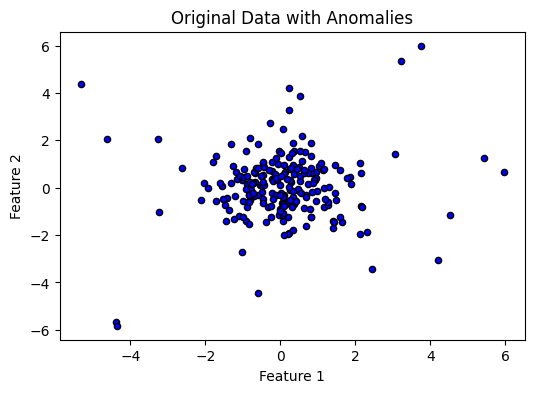

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(data_with_outliers[0], data_with_outliers[1], color="blue", s=20, edgecolor='k')
plt.title("Original Data with Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
classifiers = {
    "Isolation Forest": IsolationForest(
        n_estimators=100, contamination=0.1, random_state=42
    ),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20, contamination=0.1
    )
}

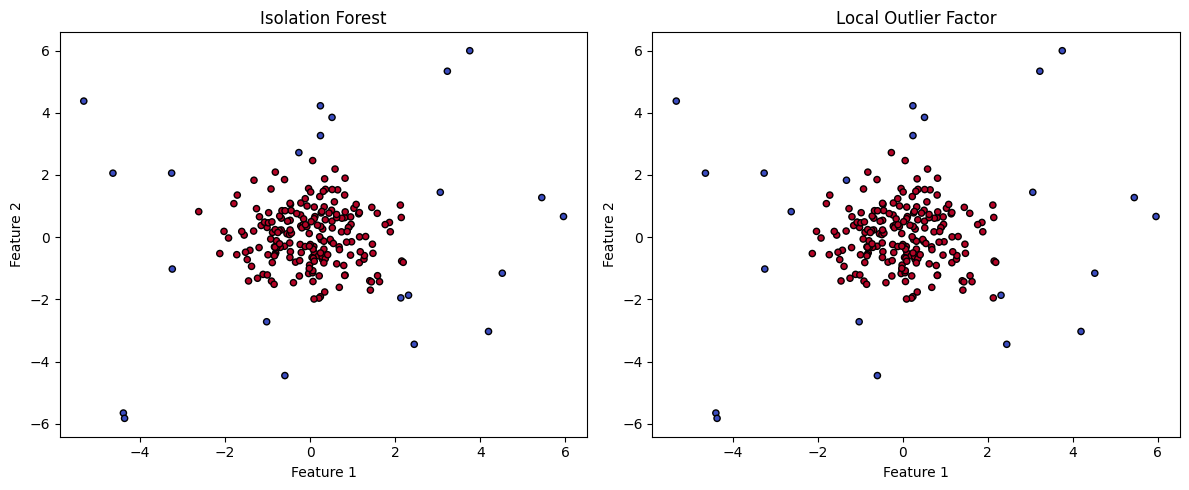

✅ Done! Red points represent anomalies (outliers).


In [17]:
# ✅ Ensure all column names are strings (fixes TypeError)
data_with_outliers.columns = data_with_outliers.columns.astype(str)

plt.figure(figsize=(12, 5))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Make a fresh copy so we don't carry over the "anomaly" column
    df_temp = data_with_outliers.copy()
    df_temp.columns = df_temp.columns.astype(str)  # re-ensure all names are strings

    # Fit the model
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(df_temp)
    else:
        clf.fit(df_temp)
        y_pred = clf.predict(df_temp)

    # Add predictions to the copy (for plotting)
    df_temp["anomaly"] = y_pred

    # Plot results
    plt.subplot(1, 2, i + 1)
    plt.title(clf_name)
    plt.scatter(
        df_temp["0"],
        df_temp["1"],
        c=df_temp["anomaly"],
        cmap="coolwarm",
        s=20,
        edgecolor="k"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

print("✅ Done! Red points represent anomalies (outliers).")


2. **DB Scan Clustering**


> Create clusters, or groups, in a non linear seperable data.

With this power to create clusters from non linear data, we are able to determine the outliers.

If the outliers are a detection, we are able to create an anomoly detection.

# **3 Major points for DB Scan Clustering**

            1.   Core point
            2.   Border point
            3.   Noise/Outlier

The DB SCan Clustering performs well when there is non-linear clustering data.

**Two Hyperperemeters:**
1. Minimum points
2. Epsilon = Radius

> 1. Core point:

When the number of data points within a radius should be greater than or equal to the minimum points.

> 2. Border point:

When the number of data points within the radius will be less than the minimum points, equalling 4.

> 3. Outliers:

No other data points within the circle.




In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [19]:
X, y = make_circles(n_samples=750, noise=0.1, factor=0.3)

First, we regenerate the `X` (features) and `y` (labels) data using `make_circles`. This ensures that the `X` variable is correctly defined for DBSCAN clustering.

In [20]:
# Regenerate X and y from make_circles to ensure 'X' is defined
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=750, noise=0.1, factor=0.3)
print("Generated synthetic data for DBSCAN.")

Generated synthetic data for DBSCAN.


Now, we'll apply DBSCAN. We need to choose appropriate hyperparameters: `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).

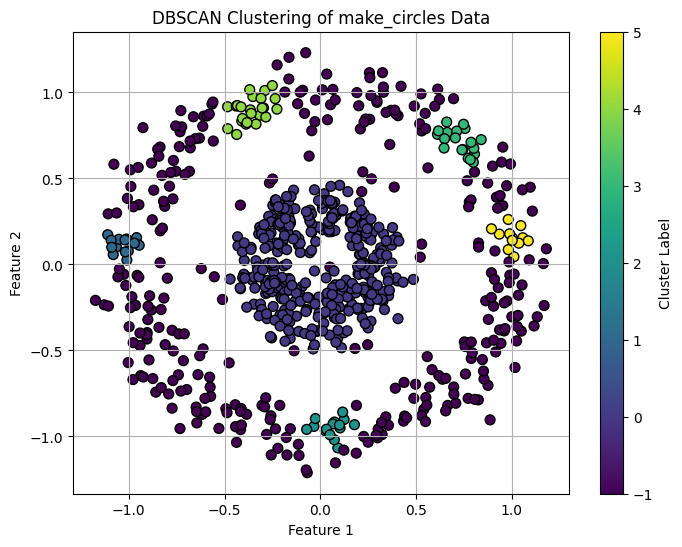

✅ DBSCAN clustering applied and visualized. -1 indicates noise points (outliers).


In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=10)
clusters = dbscan.fit_predict(X)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title('DBSCAN Clustering of make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

print("✅ DBSCAN clustering applied and visualized. -1 indicates noise points (outliers).")

3. **Local Outlier Factor**

> 2 Terms:
1. Local Outlier
2. Global Outlier

1. Local Outlier:

Data points that are near clusters.

2. Global Outlier:

Data point that is farther away from the clusters.


To find a Global Outlier, we can use Isolation forest or DB Scan.

To find local outliers, we can use a **Local Outlier factor**.

**Local Outlier factor(LOF, Algorithm)** -> LOF SCORE

LOF uses the concept of K nearest neighbor.

It will try to determine the,

> **Local Density**

LOF works like this, K = 5. With one point, we will see if its an outlier or not. Then, it will find the 5 neihboring points.

Then, with the information of the distance and avg. distance to the side, we will observe the density of the neighboring points.

Practically:

"If the average distance is less, the denisty is more.

If the distance is more, then the density is less."

In [26]:
## Network Anomaly Detection (Cybersecurity Context)


In [22]:
import pandas as pd

# Simulated network log data
data = pd.DataFrame({
    "src_ip": ["10.0.0.1","10.0.0.2","10.0.0.3","10.0.0.4","10.0.0.5","10.0.0.6","10.0.0.7","10.0.0.8"],
    "bytes_sent": [250, 300, 280, 290, 12000, 310, 270, 15000],  # spikes = anomalies
    "failed_logins": [1, 2, 1, 0, 10, 1, 0, 8]                   # 10 & 8 = anomalies
})

data


,src_ip,bytes_sent,failed_logins
0,10.0.0.1,250,1
1,10.0.0.2,300,2
2,10.0.0.3,280,1
3,10.0.0.4,290,0
4,10.0.0.5,12000,10
5,10.0.0.6,310,1
6,10.0.0.7,270,0
7,10.0.0.8,15000,8


In [23]:
from sklearn.ensemble import IsolationForest

# Train the model on bytes_sent and failed_logins
features = data[["bytes_sent", "failed_logins"]]

model = IsolationForest(contamination=0.25, random_state=42)
data["anomaly"] = model.fit_predict(features)

# -1 = anomaly, 1 = normal
data["anomaly_label"] = data["anomaly"].map({1: "Normal", -1: "Suspicious"})

data


,src_ip,bytes_sent,failed_logins,anomaly,anomaly_label
0,10.0.0.1,250,1,1,Normal
1,10.0.0.2,300,2,1,Normal
2,10.0.0.3,280,1,1,Normal
3,10.0.0.4,290,0,1,Normal
4,10.0.0.5,12000,10,-1,Suspicious
5,10.0.0.6,310,1,1,Normal
6,10.0.0.7,270,0,1,Normal
7,10.0.0.8,15000,8,-1,Suspicious


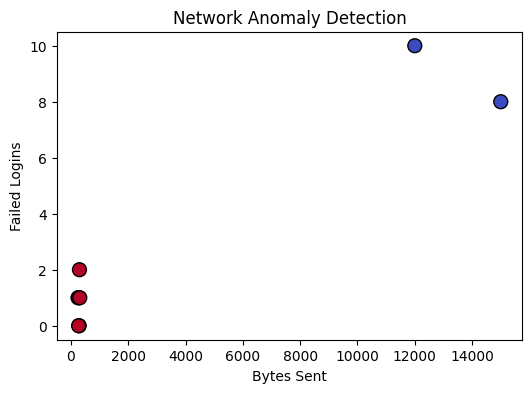

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(data["bytes_sent"], data["failed_logins"],
            c=data["anomaly"], cmap="coolwarm", edgecolor="k", s=100)
plt.title("Network Anomaly Detection")
plt.xlabel("Bytes Sent")
plt.ylabel("Failed Logins")
plt.show()
